In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [27]:
df1=pd.read_csv('statewiseEV_Vehicle_List.csv')

In [28]:
df1

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228
5,Delhi,11756,5287,1578,186,72
6,Bihar,2388,10783,89,36,37
7,Assam,357,11547,42,0,20
8,Kerala,10345,308,578,0,131
9,Odisha,9540,253,89,0,18


In [29]:
df1['TotalEV'] = df1['2W'] + df1['3W'] + df1['4W']+df1['Bus']
df1

,Region,2W,3W,4W,Bus,Chargers,TotalEV
0,Uttar Pradesh,9852,42881,458,197,207,53388
1,Maharastra,38558,893,1895,186,317,41532
2,Karnataka,32844,568,589,57,172,34058
3,Tamil Nadu,25642,396,426,0,256,26464
4,Gujarat,22359,254,423,22,228,23058
5,Delhi,11756,5287,1578,186,72,18807
6,Bihar,2388,10783,89,36,37,13296
7,Assam,357,11547,42,0,20,11946
8,Kerala,10345,308,578,0,131,11231
9,Odisha,9540,253,89,0,18,9882


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
 6   TotalEV   24 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.4+ KB


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
 6   TotalEV   24 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.4+ KB


In [32]:
df1.isnull().sum()

Region      0
2W          0
3W          0
4W          0
Bus         0
Chargers    0
TotalEV     0
dtype: int64

In [33]:
df2=pd.read_csv('EV_Chargers.csv')
df2

,State/UT,EV Charging Facility
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4
5,Chhattisgarh,51
6,Delhi,66
7,Goa,17
8,Gujarat,87
9,Haryana,114


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State/UT              31 non-null     object
 1   EV Charging Facility  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 628.0+ bytes


In [35]:
df3=pd.read_csv('charging stations commissioned under FAME India Scheme.csv')
df3

,State / Union Territory,No. of EV Charging Station under FAME
0,Delhi,21
1,Gujarat,53
2,Haryana,2
3,Karnataka,1
4,Kerala,30
5,Maharashtra,13
6,Meghalaya,1
7,Tamil Nadu,13
8,Uttar Pradesh,11
9,West Bengal,3


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   State / Union Territory                10 non-null     object
 1   No. of EV Charging Station under FAME  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [37]:
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 Shape: ', df3.shape)

DF1 Shape:  (24, 7)
DF2 Shape:  (31, 2)
DF3 Shape:  (10, 2)


In [38]:
d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2, '<<< DATASET 3 >>>', d3)

'<<< DATASET 1 >>>'

,2W,3W,4W,Bus,Chargers,TotalEV
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667,12637.166667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869,14082.879599
min,187.000000,234.000000,12.000000,0.000000,10.000000,448.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000,2101.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000,8168.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000,17968.500000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000,53388.000000


'<<< DATASET 2 >>>'

,EV Charging Facility
count,31.000000
mean,49.548387
std,50.768651
min,1.000000
25%,4.000000
50%,26.000000
75%,81.500000
max,174.000000


'<<< DATASET 3 >>>'

,No. of EV Charging Station under FAME
count,10.000000
mean,14.800000
std,16.443844
min,1.000000
25%,2.250000
50%,12.000000
75%,19.000000
max,53.000000


In [39]:
df_new=df1.drop('Chargers',axis=1)
df_new

,Region,2W,3W,4W,Bus,TotalEV
0,Uttar Pradesh,9852,42881,458,197,53388
1,Maharastra,38558,893,1895,186,41532
2,Karnataka,32844,568,589,57,34058
3,Tamil Nadu,25642,396,426,0,26464
4,Gujarat,22359,254,423,22,23058
5,Delhi,11756,5287,1578,186,18807
6,Bihar,2388,10783,89,36,13296
7,Assam,357,11547,42,0,11946
8,Kerala,10345,308,578,0,11231
9,Odisha,9540,253,89,0,9882


## Data Visualization

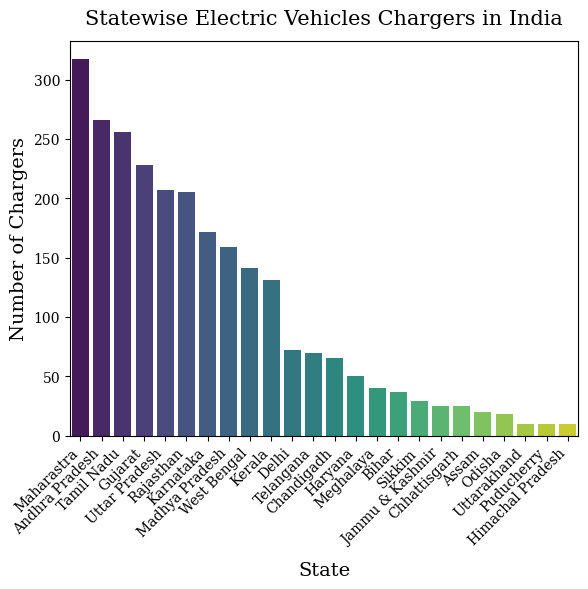

In [40]:
df1_sorted = df1.sort_values(by='Chargers', ascending=False)
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
sns.barplot(data=df1_sorted, y='Chargers', x='Region', palette='viridis')
plt.ylabel('Number of Chargers', fontsize=14, family='serif')
plt.xlabel('State', family='serif', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles Chargers in India', fontsize=15, family='serif', pad=12)
plt.tight_layout()
plt.savefig('chargers.png')

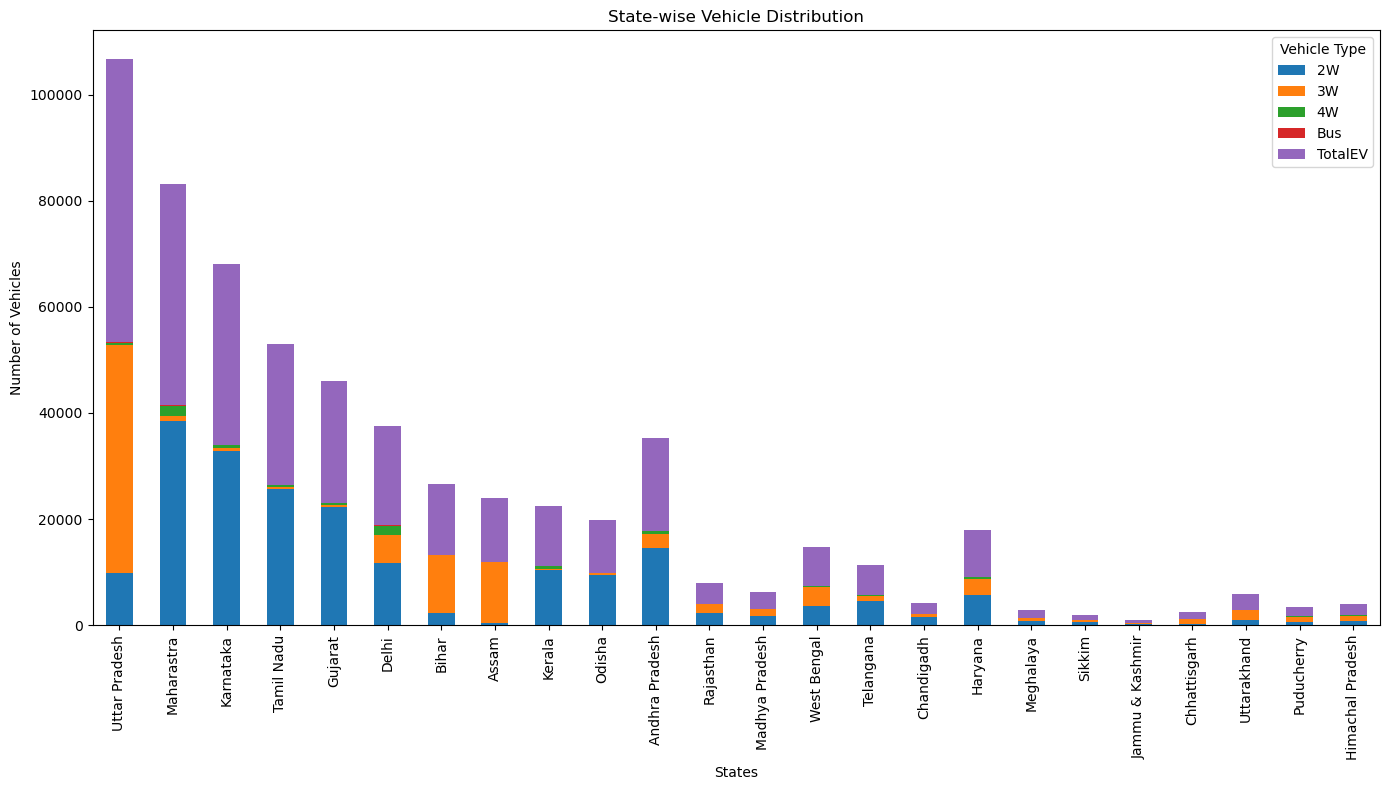

In [41]:
df_new.set_index("Region", inplace=True)

# Plotting the data
ax = df_new.plot(kind='bar', stacked=True, figsize=(14, 8))

# Adding titles and labels
plt.title('State-wise Vehicle Distribution')
plt.xlabel('States')
plt.ylabel('Number of Vehicles')
plt.legend(title='Vehicle Type')
plt.xticks(rotation=90)

# Showing the plot
plt.tight_layout()
plt.savefig('state_wise_vehicle_distribution.png')

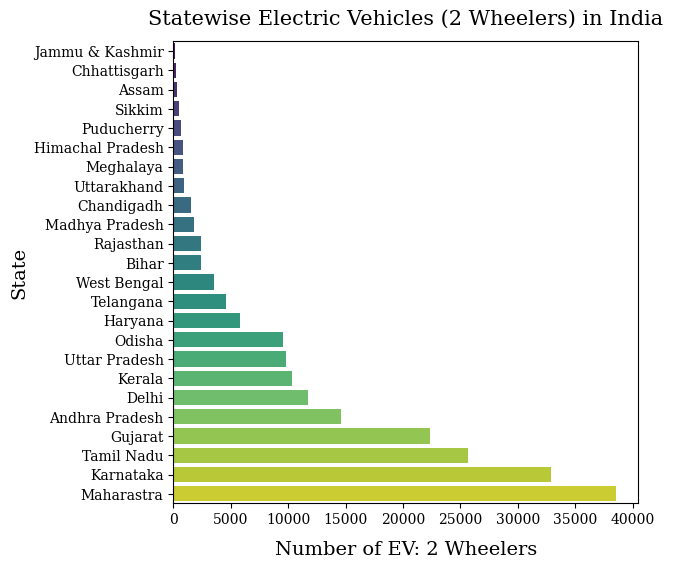

In [42]:
df1_sorted = df1.sort_values(by='2W', ascending=True)
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
sns.barplot(data=df1_sorted, y='Region', x='2W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', fontsize=15, family='serif', pad=12)
plt.show()

#### Analysis of 3-wheeler EVs
###### Observation: Uttar Pradesh, Assam and Bihar are among the top states with the majority of EV 3-wheelers while the remaining states don't seem to depend on the same.

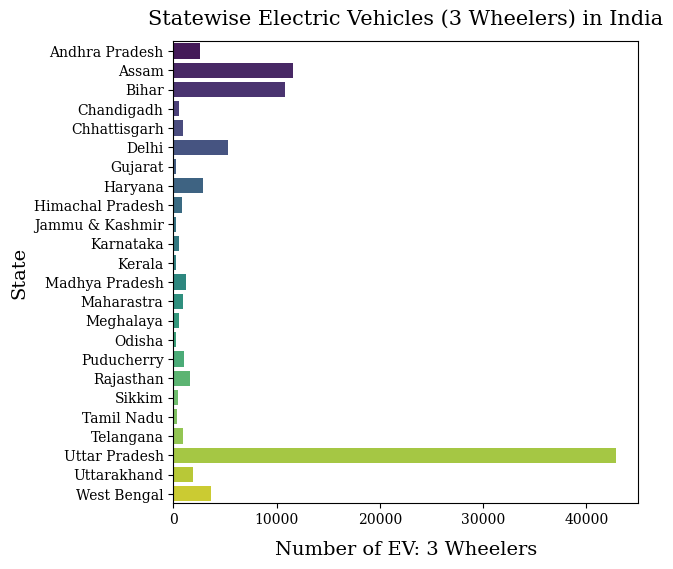

In [43]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='3W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

#### Analysis 4-wheeler EVs###### 
Observation: Maharashtra, Delhi, Karnataka, Kerala and Andhra Pradhesh are among the top states with the majority of EV 4-wheelers while the remaining states have less number of EV 4-wheelers.

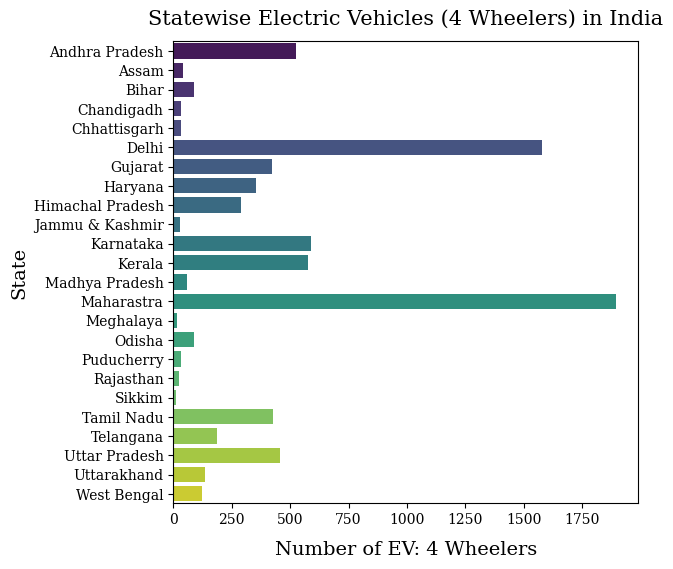

In [44]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='4W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

# Vehicle Segmentation

In [45]:
bike_data=pd.read_csv('EVbikes.csv')

In [46]:
bike_data.head()

,Unnamed: 0,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,0,Ola Electric S1,Ola,Scooter,2.98,181,5.0,85099.0,4.5,116.0,2021.0
1,1,Ola Electric S1 Pro,Ola,Scooter,4.00,181,6.5,120149.0,11.0,116.0,2021.0
2,2,TVS iQube,TVS,Scooter,3.40,75,6.5,117630.0,4.4,78.0,2020.0
3,3,Aura 300 Plus,Ather Energy,Scooter,2.90,116,4.5,129000.0,6.0,80.0,2021.0
4,4,Pure EV Epluto 7G,Pure EV,Scooter,2.70,120,3.0,109000.0,5.0,80.0,2021.0


In [47]:
bike_data.drop('Unnamed: 0', axis=1, inplace=True)
data_copy=bike_data
bike_data.drop(52, inplace=True)
bike_data.head()

,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,Ola Electric S1,Ola,Scooter,2.98,181,5.0,85099.0,4.5,116.0,2021.0
1,Ola Electric S1 Pro,Ola,Scooter,4.00,181,6.5,120149.0,11.0,116.0,2021.0
2,TVS iQube,TVS,Scooter,3.40,75,6.5,117630.0,4.4,78.0,2020.0
3,Aura 300 Plus,Ather Energy,Scooter,2.90,116,4.5,129000.0,6.0,80.0,2021.0
4,Pure EV Epluto 7G,Pure EV,Scooter,2.70,120,3.0,109000.0,5.0,80.0,2021.0


In [48]:
bike_data.columns

Index(['Model', 'Manufacturer', 'Vehicle Type', 'Battery Capacity (kWh)',
       'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)',
       'Top Speed (km/h)', 'Year of Manufacture'],
      dtype='object')

In [49]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   52 non-null     object 
 1   Manufacturer            52 non-null     object 
 2   Vehicle Type            52 non-null     object 
 3   Battery Capacity (kWh)  52 non-null     float64
 4   Range per Charge (km)   52 non-null     int64  
 5   Charging Time           52 non-null     float64
 6   Price                   52 non-null     float64
 7   Power (HP or kW)        52 non-null     float64
 8   Top Speed (km/h)        52 non-null     float64
 9   Year of Manufacture     52 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ KB


In [50]:
bike_data.isnull().sum()

Model                     0
Manufacturer              0
Vehicle Type              0
Battery Capacity (kWh)    0
Range per Charge (km)     0
Charging Time             0
Price                     0
Power (HP or kW)          0
Top Speed (km/h)          0
Year of Manufacture       0
dtype: int64

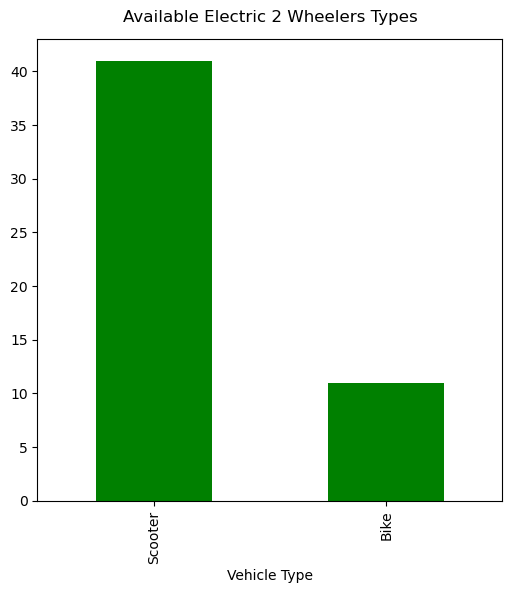

In [51]:
plt.figure(figsize=(6,6))
bike_data['Vehicle Type'].value_counts().plot(kind="bar",color="green")
plt.title(label='Available Electric 2 Wheelers Types',pad=12)
plt.savefig('bike_pic.png')

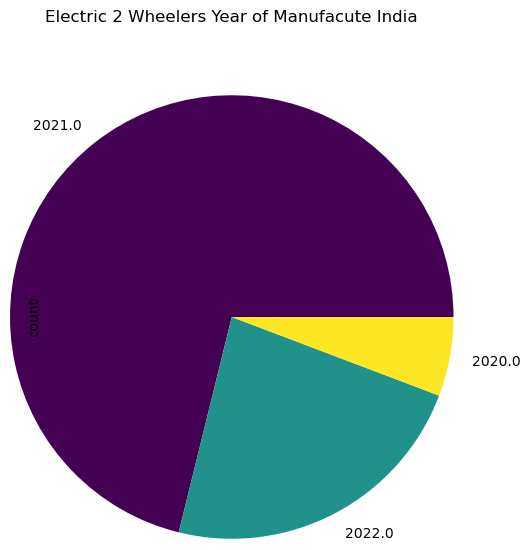

In [52]:
plt.title(label='Electric 2 Wheelers Year of Manufacute India', pad=80)
bike_data['Year of Manufacture'].value_counts().plot.pie(radius=1.5, cmap='viridis')
plt.savefig('year.png')

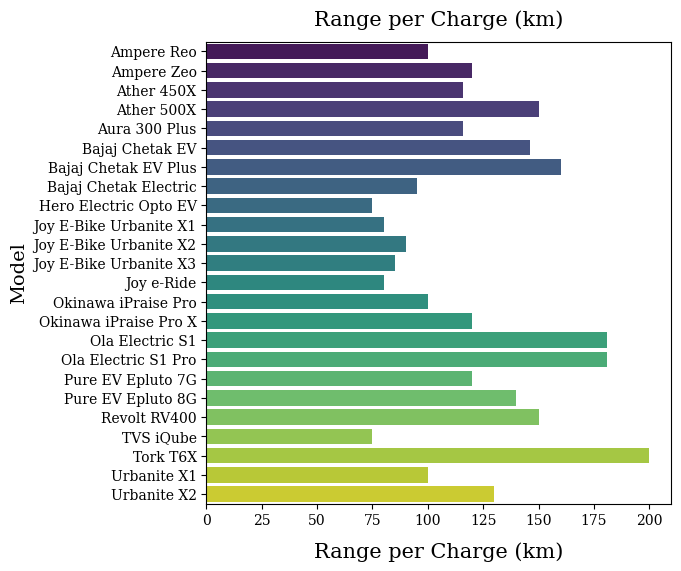

In [53]:
plt.figure(figsize=(6, 6))
sns.barplot(data=bike_data, y=bike_data['Model'].sort_values(ascending=True), x='Range per Charge (km)', palette='viridis')
plt.ylabel('Model', fontsize=14, family='serif')
plt.xlabel('Range per Charge (km)', family='serif', fontsize=15, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Range per Charge (km)', weight=200, family='serif', size=15, pad=12)
plt.savefig('range.png')

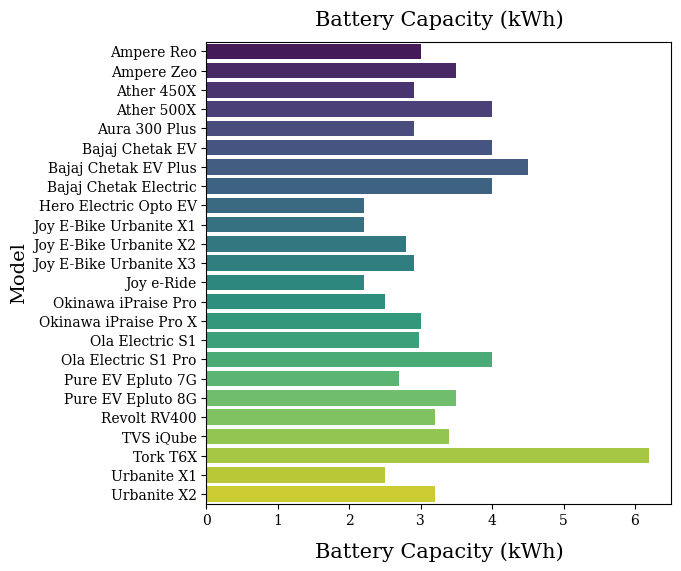

In [54]:
plt.figure(figsize=(6, 6))
sns.barplot(data=bike_data, y=bike_data['Model'].sort_values(ascending=True), x='Battery Capacity (kWh)', palette='viridis')
plt.ylabel('Model', fontsize=14, family='serif')
plt.xlabel('Battery Capacity (kWh)', family='serif', fontsize=15, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Battery Capacity (kWh)', weight=200, family='serif', size=15, pad=12)
plt.savefig('battery.png')

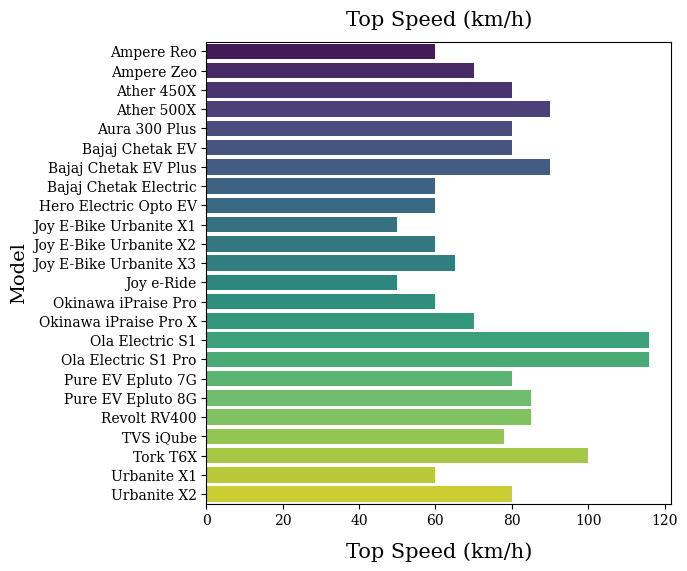

In [55]:
plt.figure(figsize=(6, 6))
sns.barplot(data=bike_data, y=bike_data['Model'].sort_values(ascending=True), x='Top Speed (km/h)', palette='viridis')
plt.ylabel('Model', fontsize=14, family='serif')
plt.xlabel('Top Speed (km/h)', family='serif', fontsize=15, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Top Speed (km/h)', weight=200, family='serif', size=15, pad=12)
plt.savefig('topspeed.png')

### Price Compression

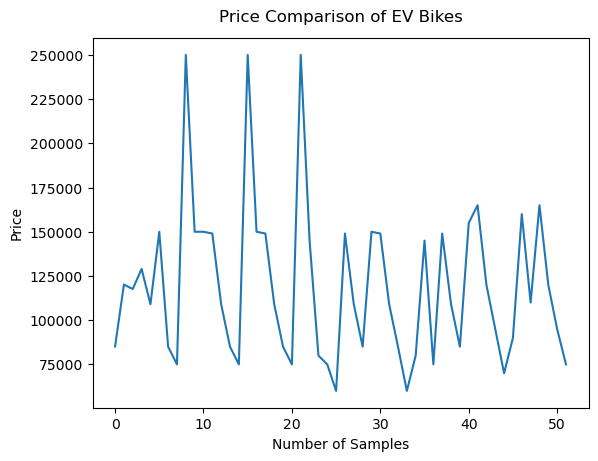

In [56]:
plt.plot(bike_data['Price'])
plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title('Price Comparison of EV Bikes',pad=12);
plt.savefig('price.png')

# Bikes Segmentation

In [57]:
new_bike_data=bike_data.drop(49) #contains Nan value
new_bike_data['Vehicle Type'].replace(to_replace=['Scooter','Bike'],value=[0, 1], inplace=True)

In [58]:
X_new= new_bike_data[['Vehicle Type','Battery Capacity (kWh)','Range per Charge (km)','Charging Time', 'Price',
         'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture']]

In [59]:
# plt.figure(figsize=(6,6))
# sns.heatmap(data=new_bike_data.corr(), annot=True, cbar=False, square=True)
# plt.title('Correlation Matrix',pad=12);

In [60]:
corr_matrix =X_new.corr()
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                        Vehicle Type  Battery Capacity (kWh)  \
Vehicle Type                1.000000                0.325040   
Battery Capacity (kWh)      0.325040                1.000000   
Range per Charge (km)       0.293957                0.782509   
Charging Time              -0.080625                0.675599   
Price                       0.319609                0.875381   
Power (HP or kW)            0.676212                0.682612   
Top Speed (km/h)            0.115145                0.619140   
Year of Manufacture         0.121543                0.027865   

                        Range per Charge (km)  Charging Time     Price  \
Vehicle Type                         0.293957      -0.080625  0.319609   
Battery Capacity (kWh)               0.782509       0.675599  0.875381   
Range per Charge (km)                1.000000       0.575805  0.770403   
Charging Time                        0.575805       1.000000  0.664765   
Price                            

## PCA

In [61]:
scaler=StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

In [62]:
pca = PCA()    #creating the instance of class PCA
pca.fit_transform(X_new_scaled) 
pca.explained_variance_ratio_

array([0.57709368, 0.17253988, 0.13328151, 0.05185932, 0.0335145 ,
       0.01811631, 0.00880176, 0.00479303])

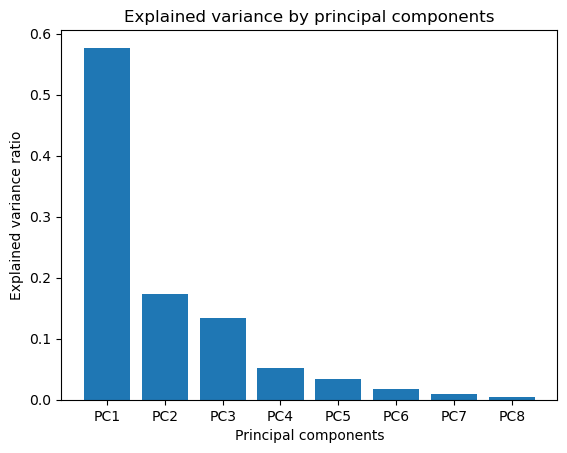

In [63]:
components=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
var_exp = pca.explained_variance_ratio_
plt.bar(components, var_exp)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.savefig('bike_pca.png')

In [64]:
### we will take the first 4 PCs for our farther calculation

In [65]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_new_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3','PC4'])
df_pca.head()

,PC1,PC2,PC3,PC4
0,1.503078,1.388905,-1.384091,2.192278
1,3.154668,1.876417,-0.996621,1.296237
2,0.027291,2.739152,1.835036,-0.281784
3,0.038391,0.851359,-0.014584,0.209208
4,-0.712720,0.165038,-0.134792,0.754506


In [66]:
rotations = pca.components_.T

rotations_df = pd.DataFrame(rotations, columns=[f'PC{i+1}' for i in range(rotations.shape[1])], index=X_new.columns[:8])

rotations_df = rotations_df.round(1)

std_devs = np.sqrt(pca.explained_variance_).round(1)

print("Standard deviations:")
print(std_devs)
print("Rotation matrix:")
print(rotations_df)

Standard deviations:
[2.2 1.2 1.  0.7]
Rotation matrix:
                        PC1  PC2  PC3  PC4
Vehicle Type            0.2 -0.7  0.4 -0.0
Battery Capacity (kWh)  0.4  0.1  0.0 -0.6
Range per Charge (km)   0.4 -0.0 -0.2  0.3
Charging Time           0.3  0.5 -0.0 -0.2
Price                   0.4  0.1  0.1 -0.3
Power (HP or kW)        0.4 -0.3  0.2  0.2
Top Speed (km/h)        0.4  0.1 -0.3  0.6
Year of Manufacture     0.0 -0.4 -0.8 -0.3


## Elbow Method

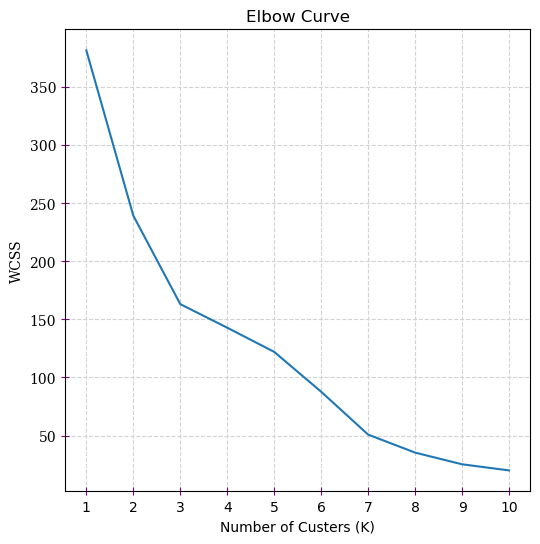

In [67]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(6,6))
plt.title('Elbow Curve')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.savefig('bike_elbow.png')

## K_Means Clustering

In [75]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [76]:
print(kmeans.labels_)

[2 2 2 2 1 2 1 1 0 0 2 2 1 1 1 0 0 2 1 1 1 0 2 1 1 1 2 1 1 0 2 1 1 1 1 2 1
 2 1 1 0 2 2 1 1 1 2 2 2 1 1]


In [77]:
new_bike_data['clusters'] = kmean.labels_

In [78]:
pd.Series(kmeans.labels_).value_counts()

1    26
2    18
0     7
Name: count, dtype: int64

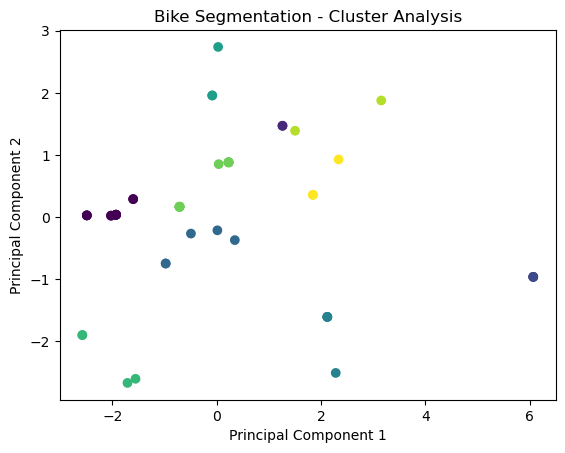

In [79]:
#new_bike_data['Cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(X_pca[:,0],X_pca[:, 1], c=new_bike_data['clusters'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Bike Segmentation - Cluster Analysis')
plt.savefig('bike_cluster.png')

### Dendrogram

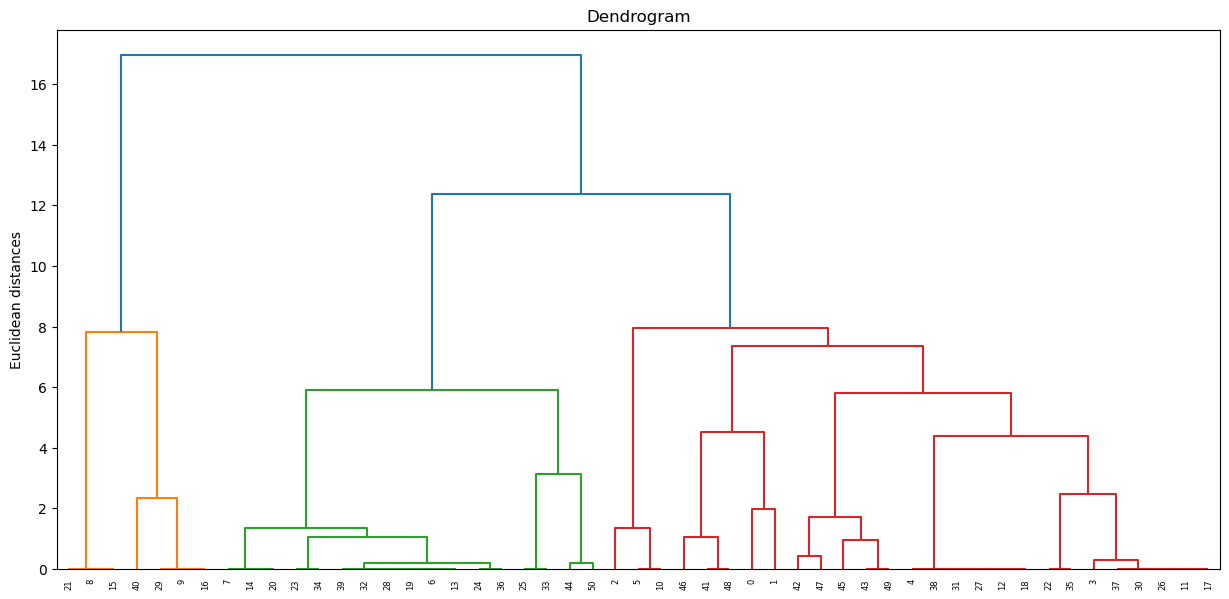

In [80]:
plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('Euclidean distances')
plt.savefig('bike_den.png')

### Making Prediction

In [81]:
pd.Series(kmeans.labels_).value_counts()

1    26
2    18
0     7
Name: count, dtype: int64

In [82]:
new_bike_data['clusters'] = kmeans.labels_

In [83]:
Cluster_0=new_bike_data[new_bike_data.clusters==0]
Cluster_1=new_bike_data[new_bike_data.clusters==1]
Cluster_2=new_bike_data[new_bike_data.clusters==2]

In [84]:
[Cluster_0["Manufacturer"].value_counts().head(),
Cluster_1["Manufacturer"].value_counts().head(),
Cluster_2["Manufacturer"].value_counts().head()]

[Manufacturer
 Revolt Motors    4
 Tork Motors      3
 Name: count, dtype: int64,
 Manufacturer
 Okinawa Autotech        8
 Pure EV                 6
 Electric Vehicle Co.    5
 Hero Motocorp           3
 Ampere Vehicles         3
 Name: count, dtype: int64,
 Manufacturer
 Ather Energy    8
 Bajaj Auto      5
 Ola             2
 TVS             1
 Pure EV         1
 Name: count, dtype: int64]

##### #ola, bajaj, ether are among most selling brands according to dataset

In [85]:
[Cluster_0["Price"].value_counts().head(),
Cluster_1["Price"].value_counts().head(),
Cluster_2["Price"].value_counts().head()]
#85K-150k

[Price
 250000.0    3
 150000.0    3
 155000.0    1
 Name: count, dtype: int64,
 Price
 109000.0    6
 85000.0     6
 75000.0     6
 80000.0     2
 60000.0     2
 Name: count, dtype: int64,
 Price
 149000.0    5
 150000.0    2
 145000.0    2
 165000.0    2
 85099.0     1
 Name: count, dtype: int64]

In [86]:
[Cluster_0["Vehicle Type"].value_counts().head(),
Cluster_1["Vehicle Type"].value_counts().head(),
Cluster_2["Vehicle Type"].value_counts().head()]

[Vehicle Type
 1    7
 Name: count, dtype: int64,
 Vehicle Type
 0    22
 1     4
 Name: count, dtype: int64,
 Vehicle Type
 0    18
 Name: count, dtype: int64]

##### scooter should be targeted first

In [87]:
[Cluster_0["Range per Charge (km)"].value_counts().head(),
Cluster_1["Range per Charge (km)"].value_counts().head(),
Cluster_2["Range per Charge (km)"].value_counts().head()]

[Range per Charge (km)
 150    4
 200    3
 Name: count, dtype: int64,
 Range per Charge (km)
 100    10
 120     9
 75      3
 80      2
 90      1
 Name: count, dtype: int64,
 Range per Charge (km)
 116    6
 181    2
 95     2
 146    2
 150    2
 Name: count, dtype: int64]

In [88]:
[Cluster_0["Battery Capacity (kWh)"].value_counts().head(),
Cluster_1["Battery Capacity (kWh)"].value_counts().head(),
Cluster_2["Battery Capacity (kWh)"].value_counts().head()]

[Battery Capacity (kWh)
 3.2    4
 6.2    3
 Name: count, dtype: int64,
 Battery Capacity (kWh)
 2.5    8
 2.7    6
 2.2    5
 3.0    4
 2.8    1
 Name: count, dtype: int64,
 Battery Capacity (kWh)
 4.00    7
 2.90    6
 2.98    1
 3.40    1
 3.50    1
 Name: count, dtype: int64]

In [206]:
[Cluster_0["Charging Time"].value_counts().head(),
Cluster_1["Charging Time"].value_counts().head(),
Cluster_2["Charging Time"].value_counts().head()]

[Charging Time
 4.0    4
 5.0    3
 Name: count, dtype: int64,
 Charging Time
 3.0    19
 2.5     4
 3.5     2
 4.0     1
 Name: count, dtype: int64,
 Charging Time
 4.5    6
 5.0    5
 6.5    2
 5.5    2
 3.5    1
 Name: count, dtype: int64]

In [208]:
[Cluster_0["Top Speed (km/h)"].value_counts().head(),
Cluster_1["Top Speed (km/h)"].value_counts().head(),
Cluster_2["Top Speed (km/h)"].value_counts().head()]

[Top Speed (km/h)
 85.0     4
 100.0    3
 Name: count, dtype: int64,
 Top Speed (km/h)
 60.0    14
 80.0     6
 70.0     3
 50.0     2
 65.0     1
 Name: count, dtype: int64,
 Top Speed (km/h)
 80.0     9
 90.0     3
 116.0    2
 60.0     2
 78.0     1
 Name: count, dtype: int64]